In [4]:
# personally made imports
import env
import wrangle_draft
import wrangle_final
import f

# typical imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

Files from wrangle: 
new_zillow_data 
get_zillow_data 
prep_zillow 
split_zillow_data 
wrangle_zillow
df, train, validate, test = wrangle_draft.wrangle_zillow()
Files from wrangle: 
new_zillow_data 
get_zillow_data 
prep_zillow 
split_zillow_data 
wrangle_zillow
df, train, validate, test = wrangle_final.wrangle_zillow()


# Predicting Housing Prices
    By Jessica Gardin

## Project Goals

The goal is to beat the baseline model in predicting housing prices for Single-Family homes that had transactions in 2017

## Project Description

Housing is a billion dollar industry for investors and possibly the biggest purchase of a lifetime for some homeowners.
Determining where and when to buy can have huge financial repercussions. We aim to help you make an informed decision!



## Initial Testing and Hypotheses

- Locationlocationlocataion. Is it really all about location?

- What catagorical valiables correlate with housing prices?

- What continous variables correlate with  housing prices?

## Data Wrangling

- Please see "Wrangle_final" to see details on how data was acquired, cleaned, and prepped.
- Please see "Explore" files to see details on how outliers and features were chosen. 

Summary:

### Acquire

Requires:

    env.user
    env.password
    env.host

get_zillow_data()

    Function gets telco_data first from save file inside folder, then, if no file exits, it will pull directly from mysql.

new_zillow_data()

    pulls data from mysql


### Cleaning

- Dropped all nulls (less than 1% of data was lost)
- Dropped outliers (less than 3% of data was lost)

Columns considered, but had to be dropped due to quantity of nulls:

bulidingclassdesc\
architecturalstyledesc\
yardbuildingsqft26\
decktypeid\
fireplace\
poolcnt\
regionidneighborhood\
airconditioningdesc\
numberofstories\
buildingqualitytypeid\
airconditioningdesc\
garagecarcnt\
garagetotalsqft

### Prep Zillow

- Cleans data
- Applies filter for outliers
- Renames columns for ease
- Drops unnecessary columns

###  Split Zillow 

Data split:

    20% of data into test group
    30% of remaining data into validate group (30% of 80% = 24% of total data)
    70% of remaining data into train group (70% of 80% = 56% of total data)

Data is further split to avoid target leakage:

    x_train = train.drop(columns=['tax_value'])
    y_train = train.tax_value

    x_validate = validate.drop(columns=['tax_value'])
    y_validate = validate.tax_value

    x_test = test.drop(columns=['tax_value'])
    y_test = test.tax_value


# Data Wrangling in Action

In [2]:
df, train, validate, test = wrangle_draft.wrangle_zillow()

In [3]:
df.head(3)

,bed,bath,sqft,tax_value,yearbuilt,fips,zip
0,8.0,4.0,3247.0,2152330.0,1937.0,6037.0,96449.0
1,5.0,5.5,4412.0,860256.0,1998.0,6059.0,96989.0
2,5.0,3.0,2981.0,655440.0,1999.0,6037.0,96374.0


In [4]:
x_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

x_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

x_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

# Exploration

In [5]:
#only use train set for intervariable exploration

In [6]:
df = train

<AxesSubplot:xlabel='bath', ylabel='tax_value'>

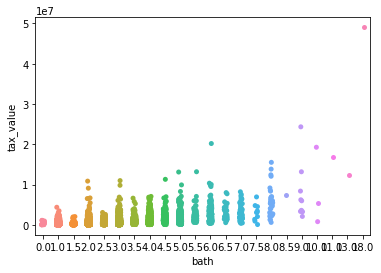

In [7]:
sns.stripplot(x = df.bath, y = df.tax_value)

# Takeaway
large tax value outlier and some high number of bathroom outliers

<AxesSubplot:xlabel='bed', ylabel='tax_value'>

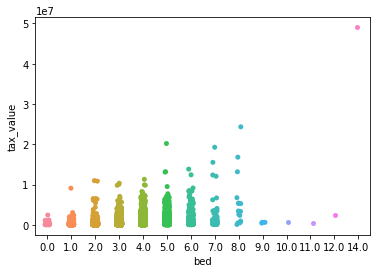

In [8]:
sns.stripplot(x = df.bed, y = df.tax_value)

# Takeaway
large tax value outlier and some high number of bedroom outliers

(array([2.9275e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01]),
 array([ 95982. , 126351.3, 156720.6, 187089.9, 217459.2, 247828.5,
        278197.8, 308567.1, 338936.4, 369305.7, 399675. ]),
 <BarContainer object of 10 artists>)

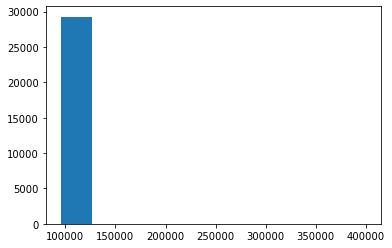

In [9]:
plt.hist(df.zip)

# Takeaway
significant zip code outliers

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

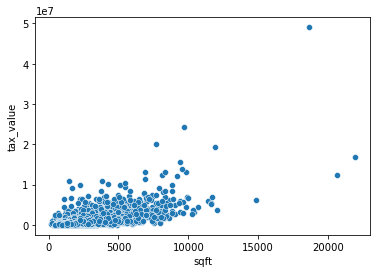

In [10]:
sns.scatterplot(x = df.sqft, y = df.tax_value)

# Takeaway
large tax value outlier and sqft outliers

In [11]:
# Suggested filters for outliers:

# df = df[(df.bath < 7) & (df.bath > 0)]
# df = df[(df.bed < 7) & (df.bed > 0)]
# df = df[(df.zip < 150_000)]
# df = df[df.sqft < 7_000]
# df = df[df.tax_value < 3_000_000]

In [12]:
# What percentage of properties have 6 or less bathrooms?
df[df.bath < 7].shape[0] / df.shape[0]

0.9960389277787263

In [13]:
# What percentage of properties have 6 or less bedrooms?
df[df.bed < 7].shape[0] / df.shape[0]

0.9970974901826873

In [14]:
# Percent of data lost?
df[df.sqft < 7_000].shape[0] / df.shape[0]

0.9961413693016903

In [15]:
# Percent of data lost?
df[df.tax_value < 3_000_000].shape[0]/df.shape[0]

0.9886289909509988

# Takeaway
acceptable data loss

In [16]:
# apply filters
df = df[(df.bath < 7) & (df.bath > 0)]
df = df[(df.bed < 7) & (df.bed > 0)]
df = df[(df.zip < 150_000)]
df = df[df.sqft < 7_000]
df = df[df.tax_value < 3_000_000]

In [17]:
cat_col = list(df[['bed', 'bath', 'yearbuilt', 'zip', 'fips']])
cont_col = list(df[['sqft']])

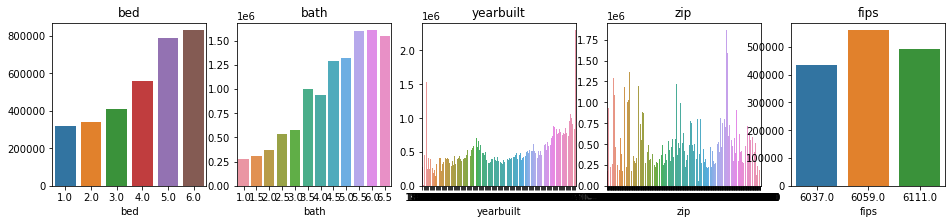

In [18]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(1,l,plot_number)

    # Title with column name.
    plt.title(col)

    sns.barplot(x = df.groupby(col).tax_value.mean().index, y = df.groupby(col).tax_value.mean().values,)

<AxesSubplot:xlabel='yearbuilt'>

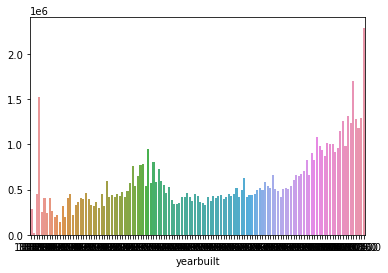

In [19]:
sns.barplot(x = train.groupby('yearbuilt').tax_value.mean().index, y = train.groupby('yearbuilt').tax_value.mean().values,)

In [20]:
train2 = train[train.yearbuilt>=1890]

<AxesSubplot:xlabel='yearbuilt'>

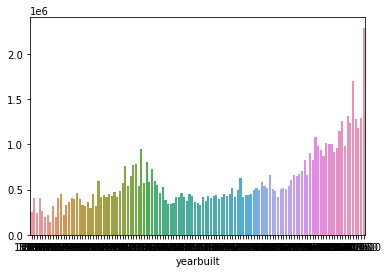

In [21]:
sns.barplot(x = train2.groupby('yearbuilt').tax_value.mean().index, y = train2.groupby('yearbuilt').tax_value.mean().values,)


In [22]:
# Add aditional year filter
df = df[df.yearbuilt>=1890]


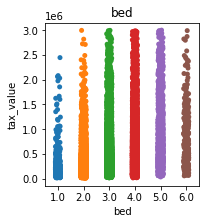

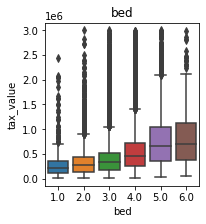

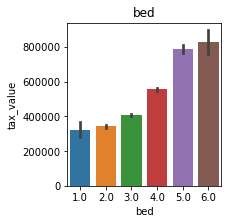

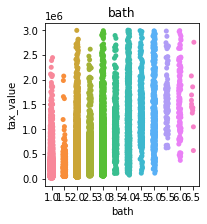

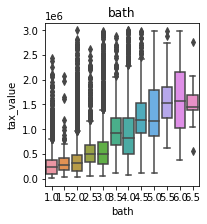

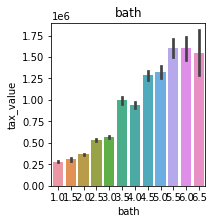

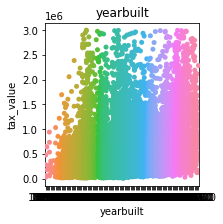

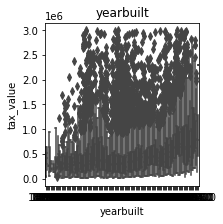

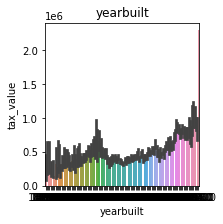

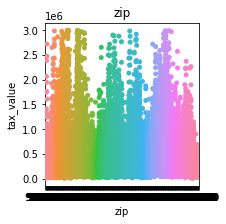

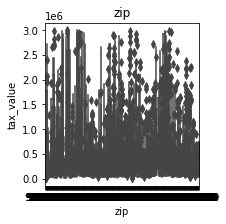

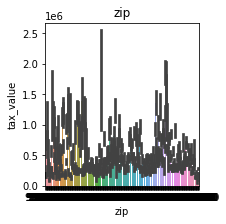

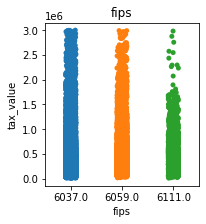

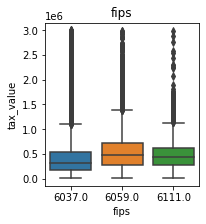

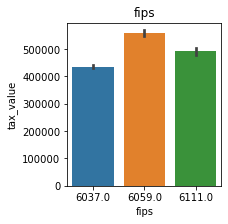

In [23]:
f.plot_categorical_and_continuous_vars(df, cat_col, cont_col)

# Visual Exploration Takeaway

Total data lost from nulls and outliers: 
[(52441-50831)/52441] * 100 = 3.07%

There are A LOT of zip codes. As this is a catagorical value that will need to be encoded, and the curse of dimensionality has a negative impact on regression models, I will drop that column from my list of features. 

# Statistical Exploration

In [24]:
train_cor = train.corr()

<AxesSubplot:>

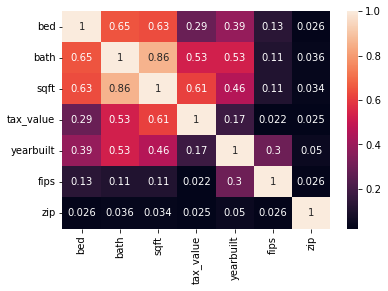

In [25]:
sns.heatmap(train_cor, annot = True)

# Takeaway
sqft and bath are stongly correlated-perhaps I'll only use one of them in the models
tax value and sqft are strongly correlated

# Dependent variable stats   
Run the appropriate statistical tests where needed. 

In [26]:
alpha = .05

In [27]:
r_bed, p_bed = stats.pearsonr(x=train.bed, y = train.tax_value)
r_bed, p_bed

(0.28541340028289386, 0.0)

In [28]:
r_bath, p_bath = stats.pearsonr(x=train.bath, y = train.tax_value)
r_bath, p_bath

(0.529323163355841, 0.0)

In [29]:
r_sqft, p_sqft = stats.pearsonr(x=train.sqft, y = train.tax_value)
r_sqft, p_sqft

(0.6108608126789236, 0.0)

In [30]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.tax_value)
r, p

(0.17495374157616844, 5.640747715761339e-200)

# Takeaway
What independent variables are correlated with the dependent variable, home value?


p < alpha for both bed and bath. Therefore, there are correlated.

the correlation coefficient is grater for baths, it indicates a stronger correlation



# Independent variable stats
Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [31]:
r, p = stats.pearsonr(x=train.bed, y = train.bath)
r, p

(0.6508556298023179, 0.0)

In [32]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.bed)
r, p

(0.3857801806856409, 0.0)

In [33]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.sqft)
r, p

(0.46050678933716716, 0.0)

In [34]:
r, p = stats.pearsonr(x=train.bed, y = train.sqft)
r, p

(0.6339746839503501, 0.0)

In [35]:
r, p = stats.pearsonr(x=train.bath, y = train.sqft)
r, p

(0.8550200395023783, 0.0)

# Takeaway
-correlation between independent variables, especially bath and sqft. I will only use sqft for modeling and skip bath. 

<font style="font-size:40px" color='blue'>Overall Exploration Takeaway</font>

1. Total data loss from outliers and nulls is ~ 3.07%
2. Bath and sqft correlate strongly.
3. Between bath and sqft, sqft correlates stronger with traget variable AND it doesnt need to be encoded.
4. Zip loations are a catagorical variable. Encoding that many zip locations may be more detrimental to processing time and modeling than worth the information gained. 
5. I will be treating bedrooms as discrete variable, hence, not encoding them. 
    (ie 4 x 1 bedroom = 4 bedrooms BUT 4 x 1.5 bathrooms != 6 bathrooms)


### put lessons learned above together and made wrangle_final.py

In [5]:
df, train, validate, test = wrangle_final.wrangle_zillow()

In [6]:
x_train = train.drop(columns=['tax_value', 'fips'])
y_train = train.tax_value

x_validate = validate.drop(columns=['tax_value', 'fips'])
y_validate = validate.tax_value

x_test = test.drop(columns=['tax_value', 'fips'])
y_test = test.tax_value

In [7]:
df.head(3)

,bed,sqft,tax_value,yearbuilt,fips,6037.0,6059.0,6111.0
0,2.0,1323.0,402224.0,1986.0,6059.0,0,1,0
2,5.0,4412.0,860256.0,1998.0,6059.0,0,1,0
3,5.0,2981.0,655440.0,1999.0,6037.0,1,0,0


In [8]:
x_train.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,2225.0,1948.0,1,0,0
37080,3.0,1220.0,1950.0,1,0,0
12407,3.0,1805.0,1954.0,1,0,0


In [9]:
df.shape, train.shape, x_validate.shape, y_test.shape

((50831, 8), (28464, 8), (12200, 6), (10167,))

# Scaling

- with all the encoded values ranging 0-1 and the sqft and yearbuilt having much wider ranges, it is possible that scale alone could end up influencing our model.
- to minimze this, I will scale the sqft and yearbuilt columns so that they have a smiliar scale impact as bed and fips. 

### MinMaxScaling
min max scaling scales a data set to a specific range

feature_range (default=(0, 1))

In [10]:
x_train_mms, x_validate_mms, x_test_mms = f.mms_scale_data(x_train, x_validate, x_test)

### Standard Scaling
scale and centers data
calculated as:

z = (x - u) / s

u is mean s is std dev

In [11]:
x_train_ss, x_validate_ss, x_test_ss = f.ss_scale_data(x_train, x_validate, x_test)

(array([ 2156., 12098.,  7678.,  3656.,  1743.,   687.,   264.,   123.,
           41.,    18.]),
 array([ 300. ,  969.2, 1638.4, 2307.6, 2976.8, 3646. , 4315.2, 4984.4,
        5653.6, 6322.8, 6992. ]),
 <BarContainer object of 10 artists>)

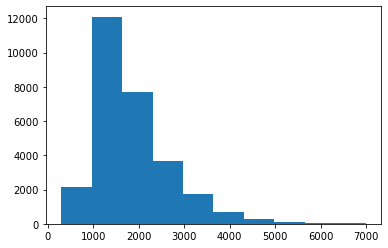

In [12]:
#original
plt.hist(x_train.sqft)

(array([ 2156., 12098.,  7678.,  3656.,  1743.,   687.,   264.,   123.,
           41.,    18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

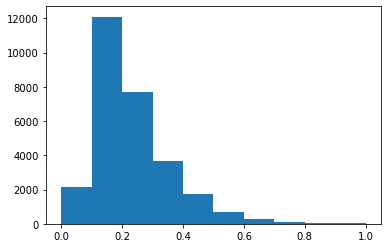

In [13]:
# scaled
plt.hist(x_train_mms.sqft)

(array([ 2156., 12098.,  7678.,  3656.,  1743.,   687.,   264.,   123.,
           41.,    18.]),
 array([-1.862317  , -1.05740928, -0.25250157,  0.55240615,  1.35731387,
         2.16222159,  2.96712931,  3.77203703,  4.57694475,  5.38185247,
         6.18676018]),
 <BarContainer object of 10 artists>)

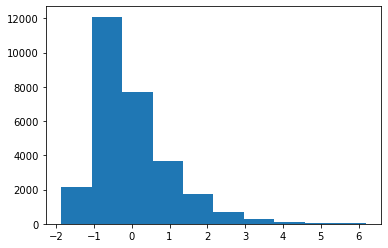

In [14]:
#scaled and centered
plt.hist(x_train_ss.sqft)

# Takeaways

I have scaled data set using two different methods. 

x-data MinMax Scaling (range 0-1) \
x_train_mms, x_validate_mms, x_test_mms

x-data Standard Scaling (mean of data = 0) \
x_train_ss, x_validate_ss, x_test_ss

y-data is unscaled and remains the same \
y_train, y_validate, y_test

In [15]:
x_train.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,2225.0,1948.0,1,0,0
37080,3.0,1220.0,1950.0,1,0,0
12407,3.0,1805.0,1954.0,1,0,0


In [16]:
x_train_ss.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,0.453056,-0.660410,1,0,0
37080,3.0,-0.755749,-0.572590,1,0,0
12407,3.0,-0.052117,-0.396951,1,0,0


In [17]:
x_train_mms.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,0.287657,0.464,1,0,0
37080,3.0,0.137478,0.480,1,0,0
12407,3.0,0.224895,0.512,1,0,0


# Models

In [49]:
#start the tables

In [50]:
#Create Model_Summary table

In [51]:
d = {'LinReg_tr1': [0,0,0]}
Model_Summary = pd.DataFrame(data=d,index = ['no_scale', 'MinMaxScale', 'StandardScale'])

# Baseline (mean)

In [52]:
predictions_tr = pd.DataFrame({
    'actual_tr': y_train})

In [53]:
predictions_tr['baseline'] = y_train.mean()

In [54]:
predictions_val = pd.DataFrame({
    'actual_val': y_validate})

In [55]:
predictions_val['baseline'] = y_validate.mean()

In [56]:
# 3. RMSE of baseline
rmse_train = mean_squared_error(predictions_tr.actual_tr, predictions_tr.baseline)**(1/2)
rmse_validate = mean_squared_error(predictions_val.actual_val, predictions_val.baseline)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  366952.35 
Validate/Out-of-Sample:  360203.07


# Add it to Model_Summary
note: y variable was note scaled and is the same for all three

In [57]:
Model_Summary.insert(0, 'Baseline_tr', [366952.35, 366952.35, 366952.35])

In [58]:
Model_Summary.insert(0, 'Baseline_val', [360203.07, 360203.07, 360203.07])

In [59]:
Model_Summary.drop(columns = 'LinReg_tr1', inplace = True)

In [60]:
Model_Summary

,Baseline_val,Baseline_tr
no_scale,360203.07,366952.35
MinMaxScale,360203.07,366952.35
StandardScale,360203.07,366952.35


# Linear Regression

In [61]:
f.lin_reg(x_train, y_train, x_validate, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  294036.73 
Validation/Out-of-Sample:  293331.6


In [62]:
f.lin_reg(x_train_mms, y_train, x_validate_mms, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  294036.79 
Validation/Out-of-Sample:  293332.26


In [63]:
f.lin_reg(x_train_ss, y_train, x_validate_ss, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  294036.76 
Validation/Out-of-Sample:  293332.82


# Add to Model_Summary!

In [64]:
Model_Summary.insert(0, 'LinReg_val', [293331.6, 293332.26, 293332.82])

In [65]:
Model_Summary.insert(0, 'LinReg_tr', [294036.73, 294036.79 , 94036.76])

In [66]:
Model_Summary

,LinReg_tr,LinReg_val,Baseline_val,Baseline_tr
no_scale,294014.04,293313.43,360203.07,366952.35
MinMaxScale,294015.75,293317.82,360203.07,366952.35
StandardScale,294014.13,293319.91,360203.07,366952.35


# Lasso Lars
(alpha=1.0)

In [67]:
f.lasso_lars(x_train, y_train, x_validate, y_validate)

RMSE for OLS using LassoLars
Training/In-Sample:  294036.9 
Validation/Out-of-Sample:  293321.09


In [68]:
f.lasso_lars(x_train_mms, y_train, x_validate_mms, y_validate)

RMSE for OLS using LassoLars
Training/In-Sample:  294036.9 
Validation/Out-of-Sample:  293321.09


In [69]:
f.lasso_lars(x_train_ss, y_train, x_validate_ss, y_validate)

RMSE for OLS using LassoLars
Training/In-Sample:  294036.9 
Validation/Out-of-Sample:  293321.09


In [70]:
#verify that dataframes are different

In [71]:
x_train.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,2225.0,1948.0,1,0,0
37080,3.0,1220.0,1950.0,1,0,0
12407,3.0,1805.0,1954.0,1,0,0


In [72]:
x_train_mms.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,0.287657,0.464,1,0,0
37080,3.0,0.137478,0.480,1,0,0
12407,3.0,0.224895,0.512,1,0,0


In [73]:
x_train_ss.head(3)

,bed,sqft,yearbuilt,6037.0,6059.0,6111.0
31857,4.0,0.453056,-0.660410,1,0,0
37080,3.0,-0.755749,-0.572590,1,0,0
12407,3.0,-0.052117,-0.396951,1,0,0


# Add to Model_Summary

In [74]:
Model_Summary.insert(0, 'LassoLars_tr', [294036.9, 294036.9, 294036.9])

In [75]:
Model_Summary.insert(0, 'LassoLars_val', [293321.09, 293321.09, 293321.09])

In [76]:
Model_Summary

,LassoLars_val,LassoLars_tr,LinReg_tr,LinReg_val,Baseline_val,Baseline_tr
no_scale,293321.09,294036.9,294014.04,293313.43,360203.07,366952.35
MinMaxScale,293321.09,294036.9,294015.75,293317.82,360203.07,366952.35
StandardScale,293321.09,294036.9,294014.13,293319.91,360203.07,366952.35


# TweedieRegressor
(power=1, alpha=0)

In [77]:
f.glm(x_train, y_train, x_validate, y_validate)

RMSE for OLS using GLM
Training/In-Sample:  366952.35 
Validation/Out-of-Sample:  360231.5


In [78]:
f.glm(x_train_mms, y_train, x_validate_mms, y_validate)

RMSE for OLS using GLM
Training/In-Sample:  304777.81 
Validation/Out-of-Sample:  303714.77


In [79]:
f.glm(x_train_ss, y_train, x_validate_ss, y_validate)

RMSE for OLS using GLM
Training/In-Sample:  304777.81 
Validation/Out-of-Sample:  303714.77


# Add it to the model!

In [80]:
Model_Summary.insert(0, 'GLM_tr', [366952.35 , 304777.81, 304777.81])

In [81]:
Model_Summary.insert(0, 'GLM_val', [360231.5, 303714.77, 303714.77])

In [82]:
Model_Summary

,GLM_val,GLM_tr,LassoLars_val,LassoLars_tr,LinReg_tr,LinReg_val,Baseline_val,Baseline_tr
no_scale,360231.50,366952.35,293321.09,294036.9,294014.04,293313.43,360203.07,366952.35
MinMaxScale,303714.77,304777.81,293321.09,294036.9,294015.75,293317.82,360203.07,366952.35
StandardScale,303714.77,304777.81,293321.09,294036.9,294014.13,293319.91,360203.07,366952.35


# Polynomial Regression

(array([9388., 9226., 5125., 2256., 1050.,  619.,  396.,  262.,  114.,
          28.]),
 array([   3254. ,  244845.8,  486437.6,  728029.4,  969621.2, 1211213. ,
        1452804.8, 1694396.6, 1935988.4, 2177580.2, 2419172. ]),
 <BarContainer object of 10 artists>)

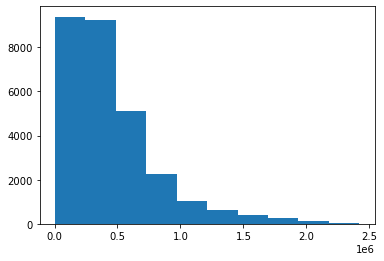

In [83]:
plt.hist(y_train)

# Takeaway


I think the rate of change of the slope is significant, and therfore it is not a straight line. I also don't think it is an s, so I am going to pick 2

data shapes
1: line
2: curve
3: s

In [84]:
f.polynomial_transform(x_train, y_train, x_validate, y_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  290176.13 
Validation/Out-of-Sample:  289734.04


In [85]:
f.polynomial_transform(x_train_mms, y_train, x_validate_mms, y_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  290175.7 
Validation/Out-of-Sample:  289744.7


In [86]:
f.polynomial_transform(x_train_ss, y_train, x_validate_ss, y_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  290175.48 
Validation/Out-of-Sample:  289737.18


# Add to table

In [87]:
Model_Summary.insert(0, 'Poly_tr', [290176.13, 290175.7, 290175.48])

In [88]:
Model_Summary.insert(0, 'Poly_val', [289734.04, 289744.7, 289737.18])

In [89]:
Model_Summary

,Poly_val,Poly_tr,GLM_val,GLM_tr,LassoLars_val,LassoLars_tr,LinReg_tr,LinReg_val,Baseline_val,Baseline_tr
no_scale,289734.04,290176.13,360231.50,366952.35,293321.09,294036.9,294014.04,293313.43,360203.07,366952.35
MinMaxScale,289744.70,290175.70,303714.77,304777.81,293321.09,294036.9,294015.75,293317.82,360203.07,366952.35
StandardScale,289737.18,290175.48,303714.77,304777.81,293321.09,294036.9,294014.13,293319.91,360203.07,366952.35


In [90]:
l = Model_Summary.min()
l.sort_values()

Poly_val         289734.04
Poly_tr          290175.48
LinReg_val       293313.43
LassoLars_val    293321.09
LinReg_tr        294014.04
LassoLars_tr     294036.90
GLM_val          303714.77
GLM_tr           304777.81
Baseline_val     360203.07
Baseline_tr      366952.35
dtype: float64

# Takeaway

The one that did the best on the validation set is:

## Model:
### Polynomial Regression (deg = 2) 

## Scaling:
### Does not matter in this data set
Looking back at statistical pearsons test, sqft had a correlation of .61 whereas the other features had much lower correlations.
I conclude that scaling effect was miniscule compared to correlation effect value and therefore did not make much a difference.

# Test Dataset

In [91]:
f.polynomial_transform(x_train, y_train, x_test, y_test)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  290176.13 
Validation/Out-of-Sample:  289581.59


# Results
RMSE for Test Set: 289581.59

# County fips codes:

6037.0 Los Angeles, CA \
6059.0 Oragne, CA \
6111.0 Ventura, CA

In [ ]:
# Residual Visuals

# Conclusion